In [ ]:
import numpy as np
import pandas as pd

# Set up locations for data and data size

In [ ]:
# Set up some basic numbers like num of predictors,num of predicted, and data set size to truncate to.
data_size = 500
num_predictors = 30
num_predicted = 7

In [ ]:
output_location = "/scratch/akashg/Protocol_Test_Scripts/test_dir/output/compiled12-Jun-2024-10:40:59_.csv"
# output_location = "/home/akashg/gen_LPN_protocol/protocol_test_resting/Obsolete/protocol_output2_6k.csv"
output_raw = pd.read_csv(output_location,header=None)
output_raw.head()

0   1   2   3   4   5   6   7   8   9   ...  53  54  55  56  57  58  59  \
0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN   
1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN   
2 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN   
3 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN   
4 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN   

   60  61  62  
0 NaN NaN NaN  
1 NaN NaN NaN  
2 NaN NaN NaN  
3 NaN NaN NaN  
4 NaN NaN NaN  

[5 rows x 63 columns]

In [ ]:
# # Truncate if necessary
# output_raw = output_raw.iloc[0:(data_size*3),:]
# output_raw.shape

## Read in the age, height, and weight input data

In [ ]:
inputs_dir = "/scratch/akashg/Protocol_Test_Scripts/filtered_input.csv"
inputs = pd.read_csv(filepath_or_buffer = inputs_dir, delimiter=',', header='infer', index_col=None)
inputs.head()

Age.Mean  Height.Mean  Weight.Mean  Ex.Level  V02Max
0  26.347707   172.454491    70.894372         1      45
1  25.978760   178.139689    59.712631         1      45
2  30.165274   169.584700    68.331414         1      45
3  27.028455   180.089640    72.041527         1      45
4  24.880418   178.291762    83.909436         1      45

# Extract and Calculate the Protocol Output Values

In [ ]:
# Columns for resting (30 predictors)
index = range(data_size)
columns1 = ['HR','Protocol_Mean Aortic Pressure','Protocol_Systolic Aortic Pressure',\
            'Protocol_Diastolic Pressure','scale_SVR','Protocol_Max LV Volume','Protocol_Min LV Volume',\
           'Protocol_Max RV volume','Protocol_Min RV Volume','Mean PA Pressure','Systolic PA pressure','PA Pulse pressure',\
            'scale_PVR','LVEF','RVEF','Systemic capacitor scale','Mean_RA_Pressure','Mean_LA_Pressure']
columns2 = ['HR','Regression_Mean Aortic Pressure','Regression_Systolic Aortic Pressure','Regression_Diastolic Pressure','scale_SVR',\
            'Regression_Max LV Volume','Regression_Min LV Volume','Regression_Max RV volume','Regression_Min RV Volume',\
            'Mean PA Pressure','Systolic PA pressure','PA Pulse pressure','scale_PVR','LVEF','RVEF',\
           'Systemic capacitor scale','Mean_RA_Pressure','Mean_LA_Pressure']
protocol_output = pd.DataFrame(0,index=index,columns = columns1, dtype=float)
true_values = pd.DataFrame(0,index=index,columns = columns2, dtype=float)
protocol_output.head()

HR  Protocol_Mean Aortic Pressure  Protocol_Systolic Aortic Pressure  \
0  0.0                            0.0                                0.0   
1  0.0                            0.0                                0.0   
2  0.0                            0.0                                0.0   
3  0.0                            0.0                                0.0   
4  0.0                            0.0                                0.0   

   Protocol_Diastolic Pressure  scale_SVR  Protocol_Max LV Volume  \
0                          0.0        0.0                     0.0   
1                          0.0        0.0                     0.0   
2                          0.0        0.0                     0.0   
3                          0.0        0.0                     0.0   
4                          0.0        0.0                     0.0   

   Protocol_Min LV Volume  Protocol_Max RV volume  Protocol_Min RV Volume  \
0                     0.0                     0.0                     0.0   
1                     0.0                     0.0                     0.0   
2                     0.0                     0.0                     0.0   
3                     0.0                     0.0                     0.0   
4                     0.0                     0.0                     0.0   

   Mean PA Pressure  Systolic PA pressure  PA Pulse pressure  scale_PVR  LVEF  \
0               0.0                   0.0                0.0        0.0   0.0   
1               0.0                   0.0                0.0        0.0   0.0   
2               0.0                   0.0                0.0        0.0   0.0   
3               0.0                   0.0                0.0        0.0   0.0   
4               0.0                   0.0                0.0        0.0   0.0   

   RVEF  Systemic capacitor scale  Mean_RA_Pressure  Mean_LA_Pressure  
0   0.0                       0.0               0.0               0.0  
1   0.0                       0.0               0.0               0.0  
2   0.0                       0.0               0.0               0.0  
3   0.0                       0.0               0.0               0.0  
4   0.0                       0.0               0.0               0.0

In [ ]:
# Replace all the spaces in the column names with underscore for easier access
protocol_output.columns = [c.replace(' ', '_') for c in protocol_output.columns]
true_values.columns = [c.replace(' ', '_') for c in true_values.columns]

In [ ]:
# Perform data processing on the trimmed data and store this in protocol_output
# Set MAP and other LPN output quantities
protocol_output.iloc[:,1] = np.array(output_raw.iloc[2::3,3]) # Mean Aortic Pressure
protocol_output.iloc[:,2] = np.array(output_raw.iloc[0::3,3]) # Systolic Aortic Pressure
protocol_output.iloc[:,3] = np.array(output_raw.iloc[1::3,3]) # Diastolic Pressure
protocol_output.iloc[:,5] = np.array(output_raw.iloc[0::3,24]) # Max LV Volume
protocol_output.iloc[:,6] = np.array(output_raw.iloc[1::3,24]) # Min LV Volume
protocol_output.iloc[:,7] = np.array(output_raw.iloc[0::3,20]) # Max RV Volume
protocol_output.iloc[:,8] = np.array(output_raw.iloc[1::3,20]) # Min RV Volume
protocol_output.iloc[:,9] = np.array(output_raw.iloc[2::3,38]) # Mean PA Pressure
protocol_output.iloc[:,10] = np.array(output_raw.iloc[0::3,38]) # Systolic PA Pressure
protocol_output.iloc[:,11] = np.subtract( np.array(output_raw.iloc[0::3,38]) , np.array(output_raw.iloc[1::3,38]) ) # PA Pulse Pressure

# Calculate LVEF
sv = np.subtract( np.array(protocol_output.iloc[:,5]) , np.array(protocol_output.iloc[:,6]) )
protocol_output.iloc[:,13] = np.divide( sv , np.array(protocol_output.iloc[:,5]) )

# Calculate RVEF
sv = np.subtract( np.array(protocol_output.iloc[:,7]) , np.array(protocol_output.iloc[:,8]) )
protocol_output.iloc[:,14] = np.divide( sv , np.array(protocol_output.iloc[:,5]) )

# Mean Atrial Pressures
protocol_output.iloc[:,16] = np.array(output_raw.iloc[2::3,30]) # Mean RA Pressure
protocol_output.iloc[:,17] = np.array(output_raw.iloc[2::3,32]) # Mean LA Pressure


protocol_output.iloc[:,0:18]

/local_scratch/slurm.198926/ipykernel_2869822/174119559.py:12: RuntimeWarning: invalid value encountered in subtract
  protocol_output.iloc[:,11] = np.subtract( np.array(output_raw.iloc[0::3,38]) , np.array(output_raw.iloc[1::3,38]) ) # PA Pulse Pressure
/local_scratch/slurm.198926/ipykernel_2869822/174119559.py:15: RuntimeWarning: invalid value encountered in subtract
  sv = np.subtract( np.array(protocol_output.iloc[:,5]) , np.array(protocol_output.iloc[:,6]) )
/local_scratch/slurm.198926/ipykernel_2869822/174119559.py:19: RuntimeWarning: invalid value encountered in subtract
  sv = np.subtract( np.array(protocol_output.iloc[:,7]) , np.array(protocol_output.iloc[:,8]) )


HR  Protocol_Mean_Aortic_Pressure  Protocol_Systolic_Aortic_Pressure  \
0    0.0                            NaN                                NaN   
1    0.0                            NaN                                NaN   
2    0.0                            NaN                                NaN   
3    0.0                            NaN                                NaN   
4    0.0                      79.342628                         126.281441   
..   ...                            ...                                ...   
495  0.0                      90.503799                         122.898209   
496  0.0                      89.748932                         119.187729   
497  0.0                      91.755379                         132.951187   
498  0.0                            NaN                                NaN   
499  0.0                            NaN                                NaN   

     Protocol_Diastolic_Pressure  scale_SVR  Protocol_Max_LV_Volume  \
0                            NaN        0.0                     NaN   
1                            NaN        0.0                     NaN   
2                            NaN        0.0                     NaN   
3                            NaN        0.0                     NaN   
4                      69.439690        0.0              108.086433   
..                           ...        ...                     ...   
495                    77.510597        0.0               96.061302   
496                    76.997688        0.0               86.664810   
497                    78.360855        0.0              102.964539   
498                          NaN        0.0                     NaN   
499                          NaN        0.0                     NaN   

     Protocol_Min_LV_Volume  Protocol_Max_RV_volume  Protocol_Min_RV_Volume  \
0                       NaN                     NaN                     NaN   
1                       NaN                     NaN                     NaN   
2                       NaN                     NaN                     NaN   
3                       NaN                     NaN                     NaN   
4                 14.422161              135.672333               41.077282   
..                      ...                     ...                     ...   
495               25.580021              111.592621               41.106510   
496               20.722368              100.552048               34.602345   
497               29.619236              127.701508               54.342079   
498                     NaN                     NaN                     NaN   
499                     NaN                     NaN                     NaN   

     Mean_PA_Pressure  Systolic_PA_pressure  PA_Pulse_pressure  scale_PVR  \
0                 NaN                   NaN                NaN        0.0   
1                 NaN                   NaN                NaN        0.0   
2                 NaN                   NaN                NaN        0.0   
3                 NaN                   NaN                NaN        0.0   
4           26.167929             39.482525          17.047052        0.0   
..                ...                   ...                ...        ...   
495         13.849988             22.029055          13.535347        0.0   
496         13.056784             23.102575          15.498075        0.0   
497         15.376538             22.146341          12.123032        0.0   
498               NaN                   NaN                NaN        0.0   
499               NaN                   NaN                NaN        0.0   

         LVEF      RVEF  Systemic_capacitor_scale  Mean_RA_Pressure  \
0         NaN       NaN                       0.0               NaN   
1         NaN       NaN                       0.0               NaN   
2         NaN       NaN                       0.0               NaN   
3         NaN       NaN                       0.0         

## Check RA and LA Pressure Limits

<Axes: >

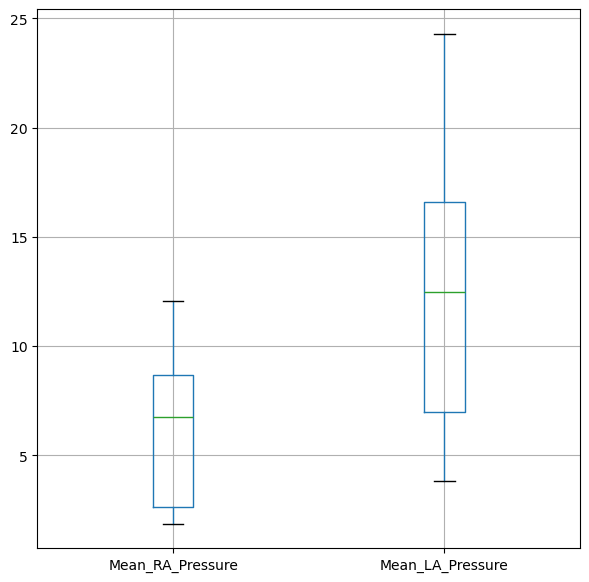

In [ ]:
protocol_output.boxplot(column=['Mean_RA_Pressure','Mean_LA_Pressure'], return_type='axes',figsize=(7, 7))

In [ ]:
RA = protocol_output[protocol_output['Mean_RA_Pressure'].between(6, 12)]
RA

HR  Protocol_Mean_Aortic_Pressure  Protocol_Systolic_Aortic_Pressure  \
4    0.0                      79.342628                         126.281441   
15   0.0                      81.037758                         111.722290   
20   0.0                      78.700981                         117.897850   
27   0.0                      83.964859                         116.223297   
31   0.0                      75.053581                          93.804070   
..   ...                            ...                                ...   
435  0.0                      87.006577                         110.007835   
436  0.0                      85.681068                         111.693420   
440  0.0                      86.739166                         121.105461   
442  0.0                      81.934868                         118.337524   
467  0.0                      78.296089                         120.231194   

     Protocol_Diastolic_Pressure  scale_SVR  Protocol_Max_LV_Volume  \
4                      69.439690        0.0              108.086433   
15                     70.976395        0.0              119.275635   
20                     69.178253        0.0              108.272934   
27                     73.823578        0.0              121.465836   
31                     65.948380        0.0               99.146469   
..                           ...        ...                     ...   
435                    75.946297        0.0              119.319038   
436                    74.468430        0.0              111.772194   
440                    75.137314        0.0              106.905708   
442                    71.375870        0.0              105.689194   
467                    68.390877        0.0              106.203407   

     Protocol_Min_LV_Volume  Protocol_Max_RV_volume  Protocol_Min_RV_Volume  \
4                 14.422161              135.672333               41.077282   
15                24.607117              139.545837               44.153847   
20                13.349881              135.019104               38.941769   
27                23.845411              142.096161               43.490479   
31                11.460783              122.014580               33.859333   
..                      ...                     ...                     ...   
435               31.543909              136.969254               48.968330   
436               26.263123              131.075333               45.384373   
440               22.665037              131.584427               47.128006   
442               15.906796              130.522964               40.269623   
467               14.758400              132.602814               40.439430   

     Mean_PA_Pressure  Systolic_PA_pressure  PA_Pulse_pressure  scale_PVR  \
4           26.167929             39.482525          17.047052        0.0   
15          24.658558             36.597950          15.768173        0.0   
20          27.132093             41.534958          17.997799        0.0   
27          25.913067             38.468807          16.279284        0.0   
31          24.103018             39.565056          19.158245        0.0   
..                ...                   ...                ...        ...   
435         21.230600             30.267622          13.361126        0.0   
436         20.158865             29.721283          13.933728        0.0   
440         20.111275             29.177935          13.545565        0.0   
442         23.667591             36.351448          16.736145        0.0   
467         25.094570             38.271599          17.014528        0.0   

         LVEF      RVEF  Systemic_capacitor_scale  Mean_RA_Pressure  \
4    0.866568  0.875180                       0.0         10.390687   
15   0.793695  0.799761                       0.0          9.861634   
20   0.876702  0.887362                       0.0         10.663004   
27   0.803686  0.811798                       0.0         

In [ ]:
RA1 = protocol_output[protocol_output['Mean_LA_Pressure'].between(14, 20)]
RA1

HR  Protocol_Mean_Aortic_Pressure  Protocol_Systolic_Aortic_Pressure  \
15   0.0                      81.037758                         111.722290   
31   0.0                      75.053581                          93.804070   
42   0.0                      78.121269                         101.246994   
45   0.0                      79.865601                          99.606636   
48   0.0                      77.907715                          97.606483   
..   ...                            ...                                ...   
435  0.0                      87.006577                         110.007835   
436  0.0                      85.681068                         111.693420   
440  0.0                      86.739166                         121.105461   
442  0.0                      81.934868                         118.337524   
467  0.0                      78.296089                         120.231194   

     Protocol_Diastolic_Pressure  scale_SVR  Protocol_Max_LV_Volume  \
15                     70.976395        0.0              119.275635   
31                     65.948380        0.0               99.146469   
42                     68.111694        0.0              100.203331   
45                     69.818344        0.0               97.298691   
48                     68.242554        0.0               98.916634   
..                           ...        ...                     ...   
435                    75.946297        0.0              119.319038   
436                    74.468430        0.0              111.772194   
440                    75.137314        0.0              106.905708   
442                    71.375870        0.0              105.689194   
467                    68.390877        0.0              106.203407   

     Protocol_Min_LV_Volume  Protocol_Max_RV_volume  Protocol_Min_RV_Volume  \
15                24.607117              139.545837               44.153847   
31                11.460783              122.014580               33.859333   
42                14.578845              122.518921               36.601170   
45                14.091188              118.526649               35.128616   
48                12.824463              121.041656               34.635651   
..                      ...                     ...                     ...   
435               31.543909              136.969254               48.968330   
436               26.263123              131.075333               45.384373   
440               22.665037              131.584427               47.128006   
442               15.906796              130.522964               40.269623   
467               14.758400              132.602814               40.439430   

     Mean_PA_Pressure  Systolic_PA_pressure  PA_Pulse_pressure  scale_PVR  \
15          24.658558             36.597950          15.768173        0.0   
31          24.103018             39.565056          19.158245        0.0   
42          22.223080             35.793983          17.648458        0.0   
45          21.173004             34.826996          17.849237        0.0   
48          22.747599             37.351768          18.548523        0.0   
..                ...                   ...                ...        ...   
435         21.230600             30.267622          13.361126        0.0   
436         20.158865             29.721283          13.933728        0.0   
440         20.111275             29.177935          13.545565        0.0   
442         23.667591             36.351448          16.736145        0.0   
467         25.094570             38.271599          17.014528        0.0   

         LVEF      RVEF  Systemic_capacitor_scale  Mean_RA_Pressure  \
15   0.793695  0.799761                       0.0          9.861634   
31   0.884406  0.889142                       0.0          7.851506   
42   0.854507  0.857434                       0.0          7.548546   
45   0.855176  0.857134                       0.0         

### Drop a few unneccesary columns and set up the blank true values dataframe

In [ ]:
drop = ['HR','scale_SVR','scale_PVR','Systemic_capacitor_scale']
protocol_output=protocol_output.drop(columns=drop)
protocol_output.reset_index(drop=True)
protocol_output

Protocol_Mean_Aortic_Pressure  Protocol_Systolic_Aortic_Pressure  \
0                              NaN                                NaN   
1                              NaN                                NaN   
2                              NaN                                NaN   
3                              NaN                                NaN   
4                        79.342628                         126.281441   
..                             ...                                ...   
495                      90.503799                         122.898209   
496                      89.748932                         119.187729   
497                      91.755379                         132.951187   
498                            NaN                                NaN   
499                            NaN                                NaN   

     Protocol_Diastolic_Pressure  Protocol_Max_LV_Volume  \
0                            NaN                     NaN   
1                            NaN                     NaN   
2                            NaN                     NaN   
3                            NaN                     NaN   
4                      69.439690              108.086433   
..                           ...                     ...   
495                    77.510597               96.061302   
496                    76.997688               86.664810   
497                    78.360855              102.964539   
498                          NaN                     NaN   
499                          NaN                     NaN   

     Protocol_Min_LV_Volume  Protocol_Max_RV_volume  Protocol_Min_RV_Volume  \
0                       NaN                     NaN                     NaN   
1                       NaN                     NaN                     NaN   
2                       NaN                     NaN                     NaN   
3                       NaN                     NaN                     NaN   
4                 14.422161              135.672333               41.077282   
..                      ...                     ...                     ...   
495               25.580021              111.592621               41.106510   
496               20.722368              100.552048               34.602345   
497               29.619236              127.701508               54.342079   
498                     NaN                     NaN                     NaN   
499                     NaN                     NaN                     NaN   

     Mean_PA_Pressure  Systolic_PA_pressure  PA_Pulse_pressure      LVEF  \
0                 NaN                   NaN                NaN       NaN   
1                 NaN                   NaN                NaN       NaN   
2                 NaN                   NaN                NaN       NaN   
3                 NaN                   NaN                NaN       NaN   
4           26.167929             39.482525          17.047052  0.866568   
..                ...                   ...                ...       ...   
495         13.849988             22.029055          13.535347  0.733711   
496         13.056784             23.102575          15.498075  0.760891   
497         15.376538             22.146341          12.123032  0.712336   
498               NaN                   NaN                NaN       NaN   
499               NaN                   NaN                NaN       NaN   

         RVEF  Mean_RA_Pressure  Mean_LA_Pressure  
0         NaN               NaN               NaN  
1         NaN               NaN               NaN  
2         NaN               NaN               NaN  
3         NaN               NaN               NaN  
4    0.875180         10.390687         20.653521  
..        ...               ...               ...  
495  0.733762          2.450088          6.838548  
496  0.760974          2.325360          5.920498  
497  0.712473          3.335068          8.079923  
498       NaN            

In [ ]:
drop = ['HR','scale_SVR','scale_PVR','Systemic_capacitor_scale']
true_values = true_values.drop(columns=drop)
true_values.reset_index(drop=True)
true_values

Regression_Mean_Aortic_Pressure  Regression_Systolic_Aortic_Pressure  \
0                                0.0                                  0.0   
1                                0.0                                  0.0   
2                                0.0                                  0.0   
3                                0.0                                  0.0   
4                                0.0                                  0.0   
..                               ...                                  ...   
495                              0.0                                  0.0   
496                              0.0                                  0.0   
497                              0.0                                  0.0   
498                              0.0                                  0.0   
499                              0.0                                  0.0   

     Regression_Diastolic_Pressure  Regression_Max_LV_Volume  \
0                              0.0                       0.0   
1                              0.0                       0.0   
2                              0.0                       0.0   
3                              0.0                       0.0   
4                              0.0                       0.0   
..                             ...                       ...   
495                            0.0                       0.0   
496                            0.0                       0.0   
497                            0.0                       0.0   
498                            0.0                       0.0   
499                            0.0                       0.0   

     Regression_Min_LV_Volume  Regression_Max_RV_volume  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
..                        ...                       ...   
495                       0.0                       0.0   
496                       0.0                       0.0   
497                       0.0                       0.0   
498                       0.0                       0.0   
499                       0.0                       0.0   

     Regression_Min_RV_Volume  Mean_PA_Pressure  Systolic_PA_pressure  \
0                         0.0               0.0                   0.0   
1                         0.0               0.0                   0.0   
2                         0.0               0.0                   0.0   
3                         0.0               0.0                   0.0   
4                         0.0               0.0                   0.0   
..                        ...               ...                   ...   
495                       0.0               0.0                   0.0   
496                       0.0               0.0                   0.0   
497                       0.0               0.0                   0.0   
498                       0.0               0.0                   0.0   
499                       0.0               0.0                   0.0   

     PA_Pulse_pressure  LVEF  RVEF  Mean_RA_Pressure  Mean_LA_Pressure  
0                  0.0   0.0   0.0               0.0               0.0  
1                  0.0   0.0   0.0               0.0               0.0  
2                  0.0   0.0   0.0               0.0               0.0  
3                  0.0   0.0   0.0               0.0               0.0  
4                  0.0   0.0   0.0               0.0               0.0  
..                 ...   ...   ...               ...               ...  
495                0.0   0.0   0.0               0.0               0.0  
496                0.0   0.0   0.0               0.0               0.0  
497                0.0   0.0   0.0               0.0               0

In [ ]:
inputs.shape

(6138, 5)

##  Calculate the true/target values

In [ ]:
inputs = inputs.iloc[0:data_size,:]
[rows,columns] = inputs.shape
for i in range(0,rows):
    hr    = -32.25 -0.36*inputs.iloc[i,0] + 0.62*inputs.iloc[i,1] +0.13*inputs.iloc[i,2] + 9.27
    true_values.iloc[i,1] = 25.45 + 0.09*inputs.iloc[i,0] + 0.4*inputs.iloc[i,1] + 0.24*inputs.iloc[i,2] + 5.57
    true_values.iloc[i,2] = 29.23 + 0.18*inputs.iloc[i,0] + 0.15*inputs.iloc[i,1] + 0.18*inputs.iloc[i,2] + 1.02
    true_values.iloc[i,5] = -269.62 - 1.03*inputs.iloc[i,0] + 2.44*inputs.iloc[i,1] + 0.63*inputs.iloc[i,2] 
    true_values.iloc[i,6] = -179.77 - 0.47*inputs.iloc[i,0]  + 1.5*inputs.iloc[i,1] + 0.01*inputs.iloc[i,2]
    true_values.iloc[i,4] = -91.21 - 0.21*inputs.iloc[i,0] + 0.68* inputs.iloc[i,1] + 0.36*inputs.iloc[i,2]
    true_values.iloc[i,3] = true_values.iloc[i,4] + (true_values.iloc[i,5] - true_values.iloc[i,6])
    
    if (hr <= 120):
        ts = 0.5 - (0.2/60)*(120 - hr)*(60/hr)  # Systolic time ratio
    else:
        ts = 0.5

    map_ex = ts*true_values.iloc[i,1] + (1 - ts)*true_values.iloc[i,2]                                          # Results are similar to Moran et al.,1995
    map_rest = ts*true_values.iloc[i,1] + (1 - ts)*true_values.iloc[i,2]
    true_values.iloc[i,0] = map_rest
#     true_values.iloc[i,0] = (1/3)*true_values.iloc[i,1] + (2/3)*(true_values.iloc[i,2]) # ONLY for testing update when the protocol is updated.

In [ ]:
true_values

Regression_Mean_Aortic_Pressure  Regression_Systolic_Aortic_Pressure  \
0                          92.530823                           119.387739   
1                          91.970912                           118.944995   
2                          91.268602                           117.968294   
3                          95.515164                           122.778384   
4                          97.365895                           124.714207   
..                               ...                                  ...   
495                        86.859449                           113.276387   
496                        83.766106                           109.932950   
497                        84.719386                           110.910071   
498                        92.428105                           119.317103   
499                        95.696106                           122.883116   

     Regression_Diastolic_Pressure  Regression_Max_LV_Volume  \
0                        73.621748                147.505026   
1                        72.395404                146.041029   
2                        73.417109                137.404739   
3                        75.096043                160.474003   
4                        76.575938                170.845979   
..                             ...                       ...   
495                      73.571285                 96.175739   
496                      71.241736                 86.583194   
497                      70.996949                 95.263183   
498                      76.835868                117.597407   
499                      78.715301                131.121694   

     Regression_Min_LV_Volume  Regression_Max_RV_volume  \
0                   46.048010                168.694275   
1                   45.965996                175.901676   
2                   42.372198                156.145227   
3                   51.509929                187.345575   
4                   55.010907                192.648013   
..                        ...                       ...   
495                 27.812723                105.424370   
496                 23.707011                 95.786650   
497                 26.880534                108.342410   
498                 36.771075                132.401699   
499                 42.304150                148.941790   

     Regression_Min_RV_Volume  Mean_PA_Pressure  Systolic_PA_pressure  \
0                   67.237259               0.0                   0.0   
1                   75.826643               0.0                   0.0   
2                   61.112686               0.0                   0.0   
3                   78.381501               0.0                   0.0   
4                   76.812941               0.0                   0.0   
..                        ...               ...                   ...   
495                 37.061354               0.0                   0.0   
496                 32.910467               0.0                   0.0   
497                 39.959760               0.0                   0.0   
498                 51.575368               0.0                   0.0   
499                 60.124246               0.0                   0.0   

     PA_Pulse_pressure  LVEF  RVEF  Mean_RA_Pressure  Mean_LA_Pressure  
0                  0.0   0.0   0.0               0.0               0.0  
1                  0.0   0.0   0.0               0.0               0.0  
2                  0.0   0.0   0.0               0.0               0.0  
3                  0.0   0.0   0.0               0.0               0.0  
4                  0.0   0.0   0.0               0.0               0.0  
..                 ...   ...   ...               ...               ...  
495                0.0   0.0   0.0               0.0               0.0  
496                0.0   0.0   0.0               0.0               0.0  
497                0.0   0.0   0.0               0.0               0

In [ ]:
true_values_base = true_values.iloc[:,0:7]
true_values_base['Regression_Stroke_Volume'] = 0
true_values_base

/local_scratch/slurm.198926/ipykernel_2869822/1548543435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_values_base['Regression_Stroke_Volume'] = 0


Regression_Mean_Aortic_Pressure  Regression_Systolic_Aortic_Pressure  \
0                          92.530823                           119.387739   
1                          91.970912                           118.944995   
2                          91.268602                           117.968294   
3                          95.515164                           122.778384   
4                          97.365895                           124.714207   
..                               ...                                  ...   
495                        86.859449                           113.276387   
496                        83.766106                           109.932950   
497                        84.719386                           110.910071   
498                        92.428105                           119.317103   
499                        95.696106                           122.883116   

     Regression_Diastolic_Pressure  Regression_Max_LV_Volume  \
0                        73.621748                147.505026   
1                        72.395404                146.041029   
2                        73.417109                137.404739   
3                        75.096043                160.474003   
4                        76.575938                170.845979   
..                             ...                       ...   
495                      73.571285                 96.175739   
496                      71.241736                 86.583194   
497                      70.996949                 95.263183   
498                      76.835868                117.597407   
499                      78.715301                131.121694   

     Regression_Min_LV_Volume  Regression_Max_RV_volume  \
0                   46.048010                168.694275   
1                   45.965996                175.901676   
2                   42.372198                156.145227   
3                   51.509929                187.345575   
4                   55.010907                192.648013   
..                        ...                       ...   
495                 27.812723                105.424370   
496                 23.707011                 95.786650   
497                 26.880534                108.342410   
498                 36.771075                132.401699   
499                 42.304150                148.941790   

     Regression_Min_RV_Volume  Regression_Stroke_Volume  
0                   67.237259                         0  
1                   75.826643                         0  
2                   61.112686                         0  
3                   78.381501                         0  
4                   76.812941                         0  
..                        ...                       ...  
495                 37.061354                         0  
496                 32.910467                         0  
497                 39.959760                         0  
498                 51.575368                         0  
499                 60.124246                         0  

[500 rows x 8 columns]

In [ ]:
true_values_base['Regression_Stroke_Volume'] = (true_values_base['Regression_Max_LV_Volume'] - true_values_base['Regression_Min_LV_Volume'])/16.6667
true_values_base

/local_scratch/slurm.198926/ipykernel_2869822/1654344016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_values_base['Regression_Stroke_Volume'] = (true_values_base['Regression_Max_LV_Volume'] - true_values_base['Regression_Min_LV_Volume'])/16.6667


Regression_Mean_Aortic_Pressure  Regression_Systolic_Aortic_Pressure  \
0                          92.530823                           119.387739   
1                          91.970912                           118.944995   
2                          91.268602                           117.968294   
3                          95.515164                           122.778384   
4                          97.365895                           124.714207   
..                               ...                                  ...   
495                        86.859449                           113.276387   
496                        83.766106                           109.932950   
497                        84.719386                           110.910071   
498                        92.428105                           119.317103   
499                        95.696106                           122.883116   

     Regression_Diastolic_Pressure  Regression_Max_LV_Volume  \
0                        73.621748                147.505026   
1                        72.395404                146.041029   
2                        73.417109                137.404739   
3                        75.096043                160.474003   
4                        76.575938                170.845979   
..                             ...                       ...   
495                      73.571285                 96.175739   
496                      71.241736                 86.583194   
497                      70.996949                 95.263183   
498                      76.835868                117.597407   
499                      78.715301                131.121694   

     Regression_Min_LV_Volume  Regression_Max_RV_volume  \
0                   46.048010                168.694275   
1                   45.965996                175.901676   
2                   42.372198                156.145227   
3                   51.509929                187.345575   
4                   55.010907                192.648013   
..                        ...                       ...   
495                 27.812723                105.424370   
496                 23.707011                 95.786650   
497                 26.880534                108.342410   
498                 36.771075                132.401699   
499                 42.304150                148.941790   

     Regression_Min_RV_Volume  Regression_Stroke_Volume  
0                   67.237259                  6.087409  
1                   75.826643                  6.004490  
2                   61.112686                  5.701941  
3                   78.381501                  6.537831  
4                   76.812941                  6.950090  
..                        ...                       ...  
495                 37.061354                  4.101773  
496                 32.910467                  3.772563  
497                 39.959760                  4.102951  
498                 51.575368                  4.849570  
499                 60.124246                  5.329042  

[500 rows x 8 columns]

In [ ]:
# Rename the last column to Cardiac output
true_values_base.rename(columns={"Regression_Stroke_Volume": "Regression_Cardiac_Output"}, inplace=True)
# 'Regression_Stroke_Volume'
true_values_base.columns

/local_scratch/slurm.198926/ipykernel_2869822/648621604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_values_base.rename(columns={"Regression_Stroke_Volume": "Regression_Cardiac_Output"}, inplace=True)


Index(['Regression_Mean_Aortic_Pressure',
       'Regression_Systolic_Aortic_Pressure', 'Regression_Diastolic_Pressure',
       'Regression_Max_LV_Volume', 'Regression_Min_LV_Volume',
       'Regression_Max_RV_volume', 'Regression_Min_RV_Volume',
       'Regression_Cardiac_Output'],
      dtype='object')

## Calculate the stroke volume and convert it to cardiac output for the Protocol data.

In [ ]:
protocol_output_base = protocol_output.iloc[:,0:7]
protocol_output_base['Protocol_Stroke_Volume'] = 0
protocol_output_base

/local_scratch/slurm.198926/ipykernel_2869822/506210351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  protocol_output_base['Protocol_Stroke_Volume'] = 0


Protocol_Mean_Aortic_Pressure  Protocol_Systolic_Aortic_Pressure  \
0                              NaN                                NaN   
1                              NaN                                NaN   
2                              NaN                                NaN   
3                              NaN                                NaN   
4                        79.342628                         126.281441   
..                             ...                                ...   
495                      90.503799                         122.898209   
496                      89.748932                         119.187729   
497                      91.755379                         132.951187   
498                            NaN                                NaN   
499                            NaN                                NaN   

     Protocol_Diastolic_Pressure  Protocol_Max_LV_Volume  \
0                            NaN                     NaN   
1                            NaN                     NaN   
2                            NaN                     NaN   
3                            NaN                     NaN   
4                      69.439690              108.086433   
..                           ...                     ...   
495                    77.510597               96.061302   
496                    76.997688               86.664810   
497                    78.360855              102.964539   
498                          NaN                     NaN   
499                          NaN                     NaN   

     Protocol_Min_LV_Volume  Protocol_Max_RV_volume  Protocol_Min_RV_Volume  \
0                       NaN                     NaN                     NaN   
1                       NaN                     NaN                     NaN   
2                       NaN                     NaN                     NaN   
3                       NaN                     NaN                     NaN   
4                 14.422161              135.672333               41.077282   
..                      ...                     ...                     ...   
495               25.580021              111.592621               41.106510   
496               20.722368              100.552048               34.602345   
497               29.619236              127.701508               54.342079   
498                     NaN                     NaN                     NaN   
499                     NaN                     NaN                     NaN   

     Protocol_Stroke_Volume  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
..                      ...  
495                       0  
496                       0  
497                       0  
498                       0  
499                       0  

[500 rows x 8 columns]

In [ ]:
protocol_output_base['Protocol_Stroke_Volume'] = (protocol_output_base['Protocol_Max_LV_Volume'] - protocol_output_base['Protocol_Min_LV_Volume'])/16.6667
protocol_output_base

/local_scratch/slurm.198926/ipykernel_2869822/2494664904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  protocol_output_base['Protocol_Stroke_Volume'] = (protocol_output_base['Protocol_Max_LV_Volume'] - protocol_output_base['Protocol_Min_LV_Volume'])/16.6667


Protocol_Mean_Aortic_Pressure  Protocol_Systolic_Aortic_Pressure  \
0                              NaN                                NaN   
1                              NaN                                NaN   
2                              NaN                                NaN   
3                              NaN                                NaN   
4                        79.342628                         126.281441   
..                             ...                                ...   
495                      90.503799                         122.898209   
496                      89.748932                         119.187729   
497                      91.755379                         132.951187   
498                            NaN                                NaN   
499                            NaN                                NaN   

     Protocol_Diastolic_Pressure  Protocol_Max_LV_Volume  \
0                            NaN                     NaN   
1                            NaN                     NaN   
2                            NaN                     NaN   
3                            NaN                     NaN   
4                      69.439690              108.086433   
..                           ...                     ...   
495                    77.510597               96.061302   
496                    76.997688               86.664810   
497                    78.360855              102.964539   
498                          NaN                     NaN   
499                          NaN                     NaN   

     Protocol_Min_LV_Volume  Protocol_Max_RV_volume  Protocol_Min_RV_Volume  \
0                       NaN                     NaN                     NaN   
1                       NaN                     NaN                     NaN   
2                       NaN                     NaN                     NaN   
3                       NaN                     NaN                     NaN   
4                 14.422161              135.672333               41.077282   
..                      ...                     ...                     ...   
495               25.580021              111.592621               41.106510   
496               20.722368              100.552048               34.602345   
497               29.619236              127.701508               54.342079   
498                     NaN                     NaN                     NaN   
499                     NaN                     NaN                     NaN   

     Protocol_Stroke_Volume  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                  5.619845  
..                      ...  
495                4.228868  
496                3.956539  
497                4.400709  
498                     NaN  
499                     NaN  

[500 rows x 8 columns]

## We've redefined the ranges and we're using 500 points

In [ ]:
true_values_base = true_values_base.sample(n=500, frac=None, replace=False, weights=None, random_state=20210528, axis=None)
protocol_output_base = protocol_output_base.sample(n=500, frac=None, replace=False, weights=None, random_state=20210528, axis=None)

In [ ]:
true_values_base.shape

(500, 8)

In [ ]:
protocol_output_base.shape

(500, 8)

## Calculate the NRMSE

In [ ]:
# Check NRMSE
from sklearn.metrics import mean_squared_error
[rows,columns] = true_values_base.shape
rmse=np.zeros((columns))
nrmse=np.zeros((columns))
for i in range(0,columns):
#     print(i)
    rmse[i] = mean_squared_error(true_values_base.iloc[:,i], protocol_output_base.iloc[:,i],squared=False) # squared = False returns RMSE,otherwise returns MSE
    nrmse[i] = (rmse[i]/np.mean(true_values_base.iloc[:,i]))*100
#     print(f'RMSE of column {i} is {rmse[i]}')
    print(f'NRMSE of column {i} is {nrmse[i]}')

ValueError: Input contains NaN.

## Checking the differences between the true values and the protocol output

In [ ]:
import numpy as np
# protocol_plot = protocol_output_base
# regression_plot = true_values_base
protocol_plot = protocol_output_base.iloc[:,np.r_[0:3,3,5,7]]
regression_plot = true_values_base.iloc[:,np.r_[0:3,3,5,7]]

In [ ]:
diff = regression_plot - protocol_plot.values
diff

Regression_Mean_Aortic_Pressure  Regression_Systolic_Aortic_Pressure  \
232                              NaN                                  NaN   
17                               NaN                                  NaN   
498                              NaN                                  NaN   
271                        11.819104                            15.542927   
361                         7.321679                             5.679387   
..                               ...                                  ...   
226                              NaN                                  NaN   
366                        -6.381372                           -10.464043   
0                                NaN                                  NaN   
107                        -5.292292                            -7.287283   
70                         -0.240917                            -1.422045   

     Regression_Diastolic_Pressure  Regression_Max_LV_Volume  \
232                            NaN                       NaN   
17                             NaN                       NaN   
498                            NaN                       NaN   
271                       6.441001                 33.683227   
361                       3.815415                 23.391781   
..                             ...                       ...   
226                            NaN                       NaN   
366                      -6.240513                 -2.544692   
0                              NaN                       NaN   
107                      -4.916957                  2.731021   
70                       -1.078785                  8.302680   

     Regression_Max_RV_volume  Regression_Cardiac_Output  
232                       NaN                        NaN  
17                        NaN                        NaN  
498                       NaN                        NaN  
271                 20.778681                   0.714480  
361                 11.823761                   0.504493  
..                        ...                        ...  
226                       NaN                        NaN  
366                 -8.083755                  -0.212802  
0                         NaN                        NaN  
107                 -3.752225                  -0.128971  
70                  -1.056332                   0.003027  

[500 rows x 6 columns]

In [ ]:
map_diff = diff[diff['Regression_Mean_Aortic_Pressure'].between(-200, -20)]
map_diff

Empty DataFrame
Columns: [Regression_Mean_Aortic_Pressure, Regression_Systolic_Aortic_Pressure, Regression_Diastolic_Pressure, Regression_Max_LV_Volume, Regression_Max_RV_volume, Regression_Cardiac_Output]
Index: []

In [ ]:
sap_diff = diff[diff['Regression_Systolic_Aortic_Pressure'].between(-200, -20)]
sap_diff

Regression_Mean_Aortic_Pressure  Regression_Systolic_Aortic_Pressure  \
336                        -5.073866                           -21.028003   
497                        -7.035993                           -22.041116   
164                        -2.612745                           -27.058220   

     Regression_Diastolic_Pressure  Regression_Max_LV_Volume  \
336                      -5.679758                 -5.486751   
497                      -7.363906                 -7.701355   
164                      -4.415817                 15.295020   

     Regression_Max_RV_volume  Regression_Cardiac_Output  
336                -20.931849                  -0.169009  
497                -19.359098                  -0.297759  
164                -48.008201                  -0.012671

In [ ]:
dap_diff = diff[diff['Regression_Systolic_Aortic_Pressure'].between(-200, -20)]
dap_diff

Regression_Mean_Aortic_Pressure  Regression_Systolic_Aortic_Pressure  \
336                        -5.073866                           -21.028003   
497                        -7.035993                           -22.041116   
164                        -2.612745                           -27.058220   

     Regression_Diastolic_Pressure  Regression_Max_LV_Volume  \
336                      -5.679758                 -5.486751   
497                      -7.363906                 -7.701355   
164                      -4.415817                 15.295020   

     Regression_Max_RV_volume  Regression_Cardiac_Output  
336                -20.931849                  -0.169009  
497                -19.359098                  -0.297759  
164                -48.008201                  -0.012671

In [ ]:
dlvv_diff = diff[diff['Regression_Systolic_Aortic_Pressure'].between(-200, -20)]
dlvv_diff

Regression_Mean_Aortic_Pressure  Regression_Systolic_Aortic_Pressure  \
336                        -5.073866                           -21.028003   
497                        -7.035993                           -22.041116   
164                        -2.612745                           -27.058220   

     Regression_Diastolic_Pressure  Regression_Max_LV_Volume  \
336                      -5.679758                 -5.486751   
497                      -7.363906                 -7.701355   
164                      -4.415817                 15.295020   

     Regression_Max_RV_volume  Regression_Cardiac_Output  
336                -20.931849                  -0.169009  
497                -19.359098                  -0.297759  
164                -48.008201                  -0.012671

In [ ]:
protocol_plot

Protocol_Mean_Aortic_Pressure  Protocol_Systolic_Aortic_Pressure  \
232                            NaN                                NaN   
17                             NaN                                NaN   
498                            NaN                                NaN   
271                      80.264832                         103.170212   
361                      86.153061                         114.662537   
..                             ...                                ...   
226                            NaN                                NaN   
366                      93.089882                         123.645264   
0                              NaN                                NaN   
107                      91.054688                         119.457512   
70                       87.306999                         114.846046   

     Protocol_Diastolic_Pressure  Protocol_Max_LV_Volume  \
232                          NaN                     NaN   
17                           NaN                     NaN   
498                          NaN                     NaN   
271                    69.614174               96.352249   
361                    74.406708               99.065224   
..                           ...                     ...   
226                          NaN                     NaN   
366                    79.874863               94.983017   
0                            NaN                     NaN   
107                    78.210716               85.390663   
70                     74.972466               90.976021   

     Protocol_Max_RV_volume  Protocol_Stroke_Volume  
232                     NaN                     NaN  
17                      NaN                     NaN  
498                     NaN                     NaN  
271              115.986343                4.702706  
361              117.665535                4.554943  
..                      ...                     ...  
226                     NaN                     NaN  
366              111.357193                4.153279  
0                       NaN                     NaN  
107              100.457581                3.918165  
70               105.390427                4.241434  

[500 rows x 6 columns]

In [ ]:
regression_plot

Regression_Mean_Aortic_Pressure  Regression_Systolic_Aortic_Pressure  \
232                        92.862732                           119.731999   
17                         89.530068                           116.193067   
498                        92.428105                           119.317103   
271                        92.083936                           118.713139   
361                        93.474739                           120.341924   
..                               ...                                  ...   
226                       100.697193                           128.365288   
366                        86.708510                           113.181220   
0                          92.530823                           119.387739   
107                        85.762395                           112.170229   
70                         87.066082                           113.424002   

     Regression_Diastolic_Pressure  Regression_Max_LV_Volume  \
232                      76.292643                127.204666   
17                       71.080615                135.871620   
498                      76.835868                117.597407   
271                      76.055175                130.035476   
361                      78.222123                122.457005   
..                             ...                       ...   
226                      81.861855                150.610010   
366                      73.634350                 92.438325   
0                        73.621748                147.505026   
107                      73.293759                 88.121684   
70                       73.893680                 99.278701   

     Regression_Max_RV_volume  Regression_Cardiac_Output  
232                142.965999                   5.242271  
17                 161.930861                   5.651055  
498                132.401699                   4.849570  
271                136.765024                   5.417186  
361                129.489296                   5.059437  
..                        ...                        ...  
226                171.727327                   6.015958  
366                103.273438                   3.940477  
0                  168.694275                   6.087409  
107                 96.705355                   3.789194  
70                 104.334095                   4.244461  

[500 rows x 6 columns]

## Comparison Figure

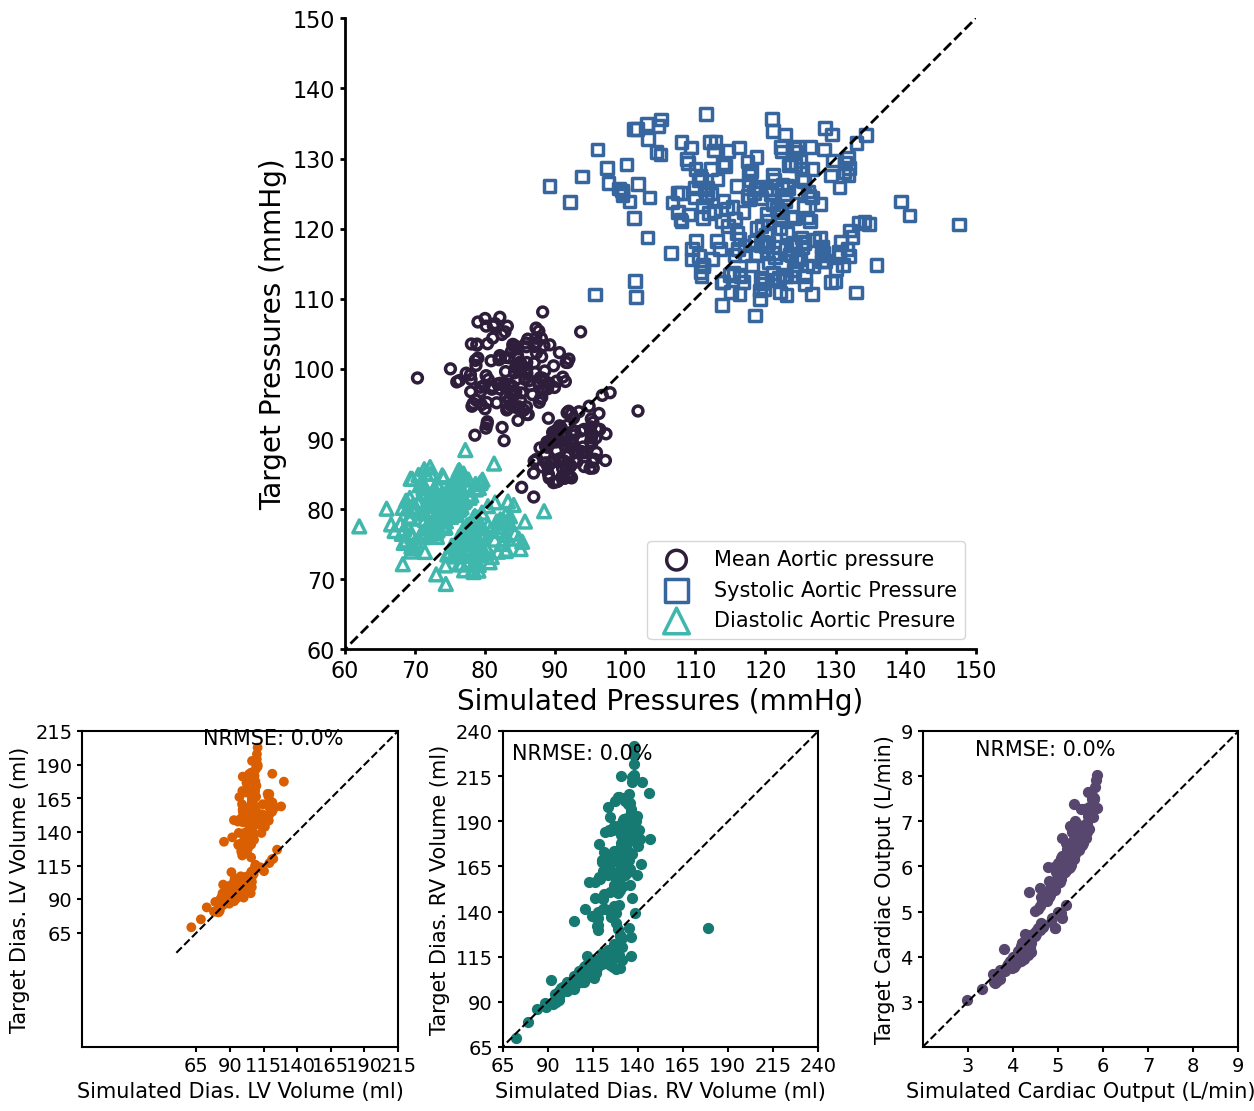

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig2 = plt.figure(constrained_layout=True,figsize=(12.5,11))

spec2 = gridspec.GridSpec(ncols=3, nrows=3,figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0:2,0:])
f2_ax2 = fig2.add_subplot(spec2[2, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 1])
f2_ax4 = fig2.add_subplot(spec2[2, 2])

# plot_x_data = np.array(protocol_plot.iloc[:,1])
# plot_y_data = np.array(regression_plot.iloc[:,1])

# Actually plot the data and the diagonal line
map = f2_ax1.scatter(x = np.array(protocol_plot.iloc[:,0]) , y = np.array(regression_plot.iloc[:,0]) , s=50 , \
                     edgecolor = '#2e1e3b' ,color = 'None', marker = "o", linewidth = 2.5)
sap = f2_ax1.scatter(x = np.array(protocol_plot.iloc[:,1]) , y = np.array(regression_plot.iloc[:,1]) , s=70 , \
                     edgecolor = '#37659e' ,color = 'None', marker = "s", linewidth = 2.5)
dap = f2_ax1.scatter(x = np.array(protocol_plot.iloc[:,2]) , y = np.array(regression_plot.iloc[:,2]) , s=85 , \
                     edgecolor = '#40b7ad' ,color = 'None', marker = "^", linewidth = 2.5)
f2_ax1.legend([map, sap, dap], ['Mean Aortic pressure', 'Systolic Aortic Pressure', 'Diastolic Aortic Presure'],loc='best',fontsize = 15,markerscale=2.0)
# f2_ax1.plot([50,160],[50,160],linestyle=(0, (3, 1, 1, 1)), linewidth=4,c='black')
f2_ax1.plot([40,180],[40,180],linestyle='dashed', linewidth=2,c='black')
# f2_ax1.spines['right'].set_visible(False)
# f2_ax1.spines['top'].set_visible(False)
f2_ax1.set_xlim([60, 150])
f2_ax1.set_ylim([60, 150])
f2_ax1.set_aspect(1)
f2_ax1.set_xlabel('Simulated Pressures (mmHg)',size=20)
f2_ax1.set_ylabel('Target Pressures (mmHg)',size=20)
f2_ax1.tick_params(axis='both', which='major', labelsize=16)
f2_ax1.tick_params(axis='both', which='minor', labelsize=12)
ticks = np.arange(60, 160, 10)
f2_ax1.set_yticks(ticks)
f2_ax1.set_xticks(ticks)
f2_ax1.xaxis.set_tick_params(width=2)
f2_ax1.yaxis.set_tick_params(width=2)


# NRMSE Annotation for Mean Aortic Pressure
# f2_ax1.annotate(f'NRMSE: {round(nrmse[0],2)}%', xy=(100, 95),  xycoords='data',
#             xytext=(112.5, 95), textcoords='data', size = 15,
#             arrowprops=dict(facecolor='#2e1e3b', shrink = 0.05, headwidth = 10),
#             horizontalalignment='left', verticalalignment='center',  # Horizontal alignment seems to be opposite of what is intended. Makes no sense.
#             )

# # NRMSE Annotation for Systolic Aortic Pressure
# f2_ax1.annotate(f'NRMSE: {round(nrmse[1],2)}%', xy=(112.5, 125),  xycoords='data',
#             xytext=(100, 125), textcoords='data', size = 15,
#             arrowprops=dict(facecolor='#37659e', shrink = 0.05, headwidth = 10),
#             horizontalalignment='right', verticalalignment='center',
#             )

# # NRMSE Annotation for Diastolic Aortic Pressure
# f2_ax1.annotate(f'NRMSE: {round(nrmse[2],2)}%', xy=(91, 75),  xycoords='data',
#             xytext=(107.5, 75), textcoords='data', size = 15,
#             arrowprops=dict(facecolor='#40b7ad', shrink = 0.05, headwidth = 10),
#             horizontalalignment='left', verticalalignment='center',
#             )

f2_ax1.spines['right'].set_visible(False)
f2_ax1.spines['top'].set_visible(False)
handles, labels = f2_ax1.get_legend_handles_labels()
for axis in ['top','bottom','left','right']:
  f2_ax1.spines[axis].set_linewidth(2.0)


# map = f2_ax2.scatter(x = np.array(protocol_plot.iloc[:,3]) , y = np.array(regression_plot.iloc[:,3]) , s=30, \
#                      color = 'None', marker = "o", linewidth = 2.0, edgecolor='#FD7846')
map = f2_ax2.scatter(x = np.array(protocol_plot.iloc[:,3]) , y = np.array(regression_plot.iloc[:,3]) , s=50, \
                     color = '#d95f02', marker = "o", linewidth = 2.0, edgecolor='None')
# f2_ax2.legend([map], ['Systolic LV Volume(ml)'] , loc='best',fontsize = 14,markerscale=1.5)
# f2_ax2.plot([50,160],[50,160],linestyle=(0, (3, 1, 1, 1)), linewidth=4,c='black')
f2_ax2.plot([50 , 250],[50 , 250],linestyle='dashed', linewidth=1.5,c='black')
# f2_ax2.spines['right'].set_visible(False)
# f2_ax2.spines['top'].set_visible(False)
f2_ax2.set_xlim([-20 , 100])
f2_ax2.set_ylim([-20 , 100])
f2_ax2.set_aspect(1)
f2_ax2.set_xlabel('Simulated Dias. LV Volume (ml)',size=15)
f2_ax2.set_ylabel('Target Dias. LV Volume (ml)',size=15)
f2_ax2.tick_params(axis='both', which='major', labelsize=14)
f2_ax2.tick_params(axis='both', which='minor', labelsize=12)
ticks1 = np.arange(65, 240, 25)
f2_ax2.set_yticks(ticks1)
f2_ax2.set_xticks(ticks1)
f2_ax2.xaxis.set_tick_params(width=1.5)
f2_ax2.yaxis.set_tick_params(width=1.5)
text_params = {'ha': 'left', 'va': 'center', 'family': 'sans-serif',
                   'fontsize' : 15, 'fontweight': 525} # Fontweight ranges from 0-1000, but sizing doesn't seem to be linear.
f2_ax2.text(x = 70, y = 210, s = f'NRMSE: {round(nrmse[3],2)}%',fontdict = text_params)
for axis in ['top','bottom','left','right']:
  f2_ax2.spines[axis].set_linewidth(1.5)

map = f2_ax3.scatter(x = np.array(protocol_plot.iloc[:,4]) , y = np.array(regression_plot.iloc[:,4]) , s=50 , c='#167a72')
# f2_ax3.legend([map], ['Systolic RV Volume'] , loc='best',fontsize = 14,markerscale=1.5)
# f2_ax3.plot([50,160],[50,160],linestyle=(0, (3, 1, 1, 1)), linewidth=4,c='black')
f2_ax3.plot([50 , 250],[50 , 250],linestyle='dashed', linewidth=1.5,c='black')
# f2_ax3.spines['right'].set_visible(False)
# f2_ax3.spines['top'].set_visible(False)
f2_ax3.set_xlim([65 , 240])
f2_ax3.set_ylim([65 , 240])
f2_ax3.set_aspect(1)
f2_ax3.set_xlabel('Simulated Dias. RV Volume (ml)',size=15)
f2_ax3.set_ylabel('Target Dias. RV Volume (ml)',size=15)
f2_ax3.tick_params(axis='both', which='major', labelsize=14)
f2_ax3.tick_params(axis='both', which='minor', labelsize=12)
ticks2 = np.arange(65, 260, 25)
f2_ax3.set_yticks(ticks2)
f2_ax3.set_xticks(ticks2)
f2_ax3.xaxis.set_tick_params(width=1.5)
f2_ax3.yaxis.set_tick_params(width=1.5)
text_params1 = {'ha': 'left', 'va': 'center', 'family': 'sans-serif',
                   'fontsize' : 15, 'fontweight': 525} # Fontweight ranges from 0-1000, but sizing doesn't seem to be linear.
f2_ax3.text(x = 70, y = 227.5, s = f'NRMSE: {round(nrmse[5],2)}%',fontdict = text_params1)
for axis in ['top','bottom','left','right']:
  f2_ax3.spines[axis].set_linewidth(1.5)

map = f2_ax4.scatter(x = np.array(protocol_plot.iloc[:,5]) , y = np.array(regression_plot.iloc[:,5]) , s=50 , c='#57466D')
# f2_ax4.legend([map], ['Cardiac Output (L/min)'] , loc='best',fontsize = 14,markerscale=1.5)
# f2_ax4.plot([50,160],[50,160],linestyle=(0, (3, 1, 1, 1)), linewidth=4,c='black')
f2_ax4.plot([2 , 9],[2 , 9],linestyle='dashed', linewidth=1.5,c='black')
# f2_ax4.spines['right'].set_visible(False)
# f2_ax4.spines['top'].set_visible(False)
f2_ax4.set_xlim([2 , 9])
f2_ax4.set_ylim([2 , 9])
f2_ax4.set_aspect(1)
f2_ax4.set_xlabel('Simulated Cardiac Output (L/min)',size=15)
f2_ax4.set_ylabel('Target Cardiac Output (L/min)',size=15)
f2_ax4.tick_params(axis='both', which='major', labelsize=14)
f2_ax4.tick_params(axis='both', which='minor', labelsize=12)
ticks3 = np.arange(3, 10, 1)
f2_ax4.set_yticks(ticks3)
f2_ax4.set_xticks(ticks3)
f2_ax4.xaxis.set_tick_params(width=1.5)
f2_ax4.yaxis.set_tick_params(width=1.5)
text_params2 = {'ha': 'left', 'va': 'center', 'family': 'sans-serif',
                   'fontsize' : 15, 'fontweight': 525} # Fontweight ranges from 0-1000, but sizing doesn't seem to be linear.
f2_ax4.text(x = 3.15, y = 8.6, s = f'NRMSE: {round(nrmse[7],2)}%',fontdict = text_params2)
for axis in ['top','bottom','left','right']:
  f2_ax4.spines[axis].set_linewidth(1.5)

fig2

# plt.savefig("comparison_result.png",dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', format='png',
#         transparent=False, bbox_inches=None, pad_inches=0.1,metadata=None)

## Seaborn colour pallettes for reference

In [ ]:
import seaborn as sns
pal = sns.color_palette()
print(pal.as_hex())

In [ ]:
import seaborn as sns
pal = sns.color_palette("muted")
print(pal.as_hex())

In [ ]:
import seaborn as sns
pal = sns.color_palette("pastel")
print(pal.as_hex())

In [ ]:
import seaborn as sns
pal = sns.color_palette("mako")
print(pal.as_hex())

In [ ]:
import seaborn as sns
pal = sns.color_palette("viridis")
print(pal.as_hex())

In [ ]:
import seaborn as sns
pal = sns.color_palette("PuOr")
print(pal.as_hex())

In [ ]:
import seaborn as sns
pal = sns.color_palette("Paired")
print(pal.as_hex())

In [ ]:
import seaborn as sns
pal = sns.color_palette("Dark2_r")
print(pal.as_hex())

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np


x_names = ['Mean Aortic Pressure', 'Systolic Aortic Pressure', 'Diastolic Aortic Pressure',\
                                'Diastolic LV Volume','Diastolic RV Volume','Stroke Volume']


# gs1 = gridspec.GridSpec(10, 10)
fig, axes = plt.subplots(3, 2,figsize=(10, 10),constrained_layout = True)
# fig.set_aspect('equal')
y_cols = protocol_plot.columns

for r in range(len(y_cols)):
    #b = plt.figurae(figsize=(10,10))
    #a = plt.axes(aspect='equal')
    
    protocol_plot = np.array(protocol_plot)
    regression_plot = np.array(regression_plot)
    
    thisaxis = axes.flat[r]
    
    plot_x_data = protocol_plot[:,r]
    plot_y_data = regression_plot[:,r]
    fig2=thisaxis.scatter(x=plot_x_data, y=plot_y_data,s=15,c='black')
#     plt.tight_layout(pad=0.001, w_pad=0.001, h_pad=0.001)
#     fig.box(on=None) 
    
    
    #minval = min([min(plot_x_data), min(plot_y_data)])
    #maxval = max([max(plot_x_data), max(plot_x_data)])
    
    minval = min(plot_x_data)
    maxval = max(plot_x_data)
    
    thisaxis.set_xlim([0.95*minval, 1.05*maxval])
    thisaxis.set_ylim([0.95*minval, 1.05*maxval])
#     thisaxis.set_xlabel(f'{x_names[r]}', fontsize=14)

    thisaxis.set_ylabel(f'Target Hemodynamic Parameter', fontsize=14)
    thisaxis.set_aspect(1)
    thisaxis.spines['right'].set_visible(False)
    thisaxis.spines['top'].set_visible(False)
    thisaxis.yaxis.set_ticks_position('left')
    thisaxis.xaxis.set_ticks_position('bottom')
    thisaxis.tick_params(axis='both', which='major', labelsize=16)
    thisaxis.tick_params(axis='both', which='minor', labelsize=12)
    
# plt.ax.set_xticklabels(x_ticks, rotation=0, fontsize=14)
# plt.ax.set_yticklabels(y_ticks, rotation=0, fontsize=14)
#    thisaxis.tick_params(labelsize=16)
# plt.plot([0, 0], [2, 2], color='k', linestyle='-', linewidth=2)
# plt.show()
    thisaxis.annotate("",
              xy=(0.95*minval, 0.95*minval), xycoords='data',
              xytext=(1.05*maxval, 1.05*maxval), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              connectionstyle="arc3,rad=0.",
                              linewidth=1.5,
                              alpha  = 0.75,), 
              )

# plt.subplot_tool()
# plt.show()
# plt.savefig("test.png",dpi=150, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format='png',
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None, metadata=None)

In [ ]:
protocol_output_base.columns = ['Mean_Aortic_Pressure', 'Systolic_Aortic_Pressure', 'Diastolic_Pressure','Max_LV_Volume',\
                                'Min_LV_Volume','Max_RV_Volume','Min_RV_Volume','Stroke_Volume']
true_values_base.columns = ['Mean_Aortic_Pressure', 'Systolic_Aortic_Pressure', 'Diastolic_Pressure','Max_LV_Volume',\
                            'Min_LV_Volume','Max_RV_Volume','Min_RV_Volume','Stroke_Volume']

In [ ]:
diff = true_values_base.subtract(protocol_output_base)
diff

In [ ]:
diff = diff.iloc[0:data_size-2,:]

In [ ]:
diff.min()

In [ ]:
diff.max()

In [ ]:
_ = diff.hist(figsize=(30,30))

In [ ]:
# import pyCompare
# import numpy as np
# # pyCompare.blandAltman(np.array(true_values_base.iloc[np.r_[0:498,500:],2]),np.array(protocol_output_base.iloc[np.r_[0:498,500:],2]),confidenceIntervalMethod='approximate',detrend=None,percentage=True)
# pyCompare.blandAltman(np.array(true_values_base.iloc[0:498,0]),np.array(protocol_output_base.iloc[0:498,0]),confidenceIntervalMethod='exact paired',detrend=None,percentage=True)

In [ ]:
import pyCompare
import numpy as np
for r in range(8):
    pyCompare.blandAltman(np.array(true_values_base.iloc[0:498,r]),np.array(protocol_output_base.iloc[0:498,r]),confidenceIntervalMethod='approximate',detrend=None,percentage=False)

In [ ]:
diff.plot(subplots=True,figsize=(20,20))

In [ ]:
diff.iloc[80:100,:]

In [ ]:
true_values_base.iloc[80:100,:]

In [ ]:
inputs.min(axis=0)

In [ ]:
_=inputs.hist(figsize=(20,20))